In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202251          7   6372     3911    8833      10           6   
1     202250          7   6590     3100   10080      10           5   
2     202249          7   5095     3212    6978       8           5   
3     202248          7   4985     3043    6927       8           5   
4     202247          7   6087     3733    8441       9           5   
5     202246          7   3033     1392    4674       5           3   
6     202245          7   3827     1720    5934       6           3   
7     202244          7   4271     2231    6311       6           3   
8     202243          7   5863     3302    8424       9           5   
9     202242          7   3770     1950    5590       6           3   
10    202241          7   4177     2219    6135       6           3   
11    202240          7   4883     1472    8294       7           2   
12    202239          7   2041      331    3751       3           0   
13    202238          7   1771      419    3123       3           1   
14    202237          7   1725      499    2951       3           1   
15    202236          7   1069      178    1960       2           1   
16    202235          7   1581      400    2762       2           0   
17    202234          7   2266      788    3744       3           1   
18    202233          7   7340        0   17399      11           0   
19    202232          7   7801     4086   11516      12           6   
20    202231          7   6896     4170    9622      10           6   
21    202230          7   9039     5770   12308      14           9   
22    202229          7  14851    10060   19642      22          15   
23    202228          7  15471    11028   19914      23          16   
24    202227          7  21191    16198   26184      32          24   
25    202226          7  16854    12806   20902      25          19   
26    202225          7  22246    18011   26481      34          28   
27    202224          7  22458    18105   26811      34          27   
28    202223          7  18772    14875   22669      28          22   
29    202222          7  18916    14941   22891      29          23   
...      ...        ...    ...      ...     ...     ...         ...   
1643  199126          7  17608    11304   23912      31          20   
1644  199125          7  16169    10700   21638      28          18   
1645  199124          7  16171    10071   22271      28          17   
1646  199123          7  11947     7671   16223      21          13   
1647  199122          7  15452     9953   20951      27          17   
1648  199121          7  14903     8975   20831      26          16   
1649  199120          7  19053    12742   25364      34          23   
1650  199119          7  16739    11246   22232      29          19   
1651  199118          7  21385    13882   28888      38          25   
1652  199117          7  13462     8877   18047      24          16   
1653  199116          7  14857    10068   19646      26          18   
1654  199115          7  13975     9781   18169      25          18   
1655  199114          7  12265     7684   16846      22          14   
1656  199113          7   9567     6041   13093      17          11   
1657  199112          7  10864     7331   14397      19          13   
1658  199111          7  15574    11184   19964      27          19   
1659  199110          7  16643    11372   21914      29          20   
1660  199109          7  13741     8780   18702      24          15   
1661  199108          7  13289     8813   17765      23          15   
1662  199107          7  12337     8077   16597      22          15   
1663  199106          7  10877     7013   14741      19          12   
1664  199105          7  10442     6544   14340      18          11   
1665  199104          7   7913     4563   11263      14           8   
1666  199103          7  15387    10484   20290      27          18   
1667  199102          7  16277  

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [6]:
 def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

In [10]:
sorted_data = raw_data.set_index('period').sort_index()

In [13]:
 periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

In [18]:
 first_august_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1990,
                                    sorted_data.index[-1].year)]

In [21]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

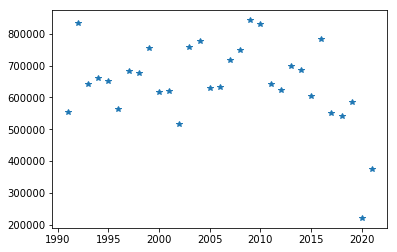

In [22]:
yearly_incidence.plot(style='*')

In [23]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1991    553090
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64